In [1]:
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=1

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=1


In [2]:
#Cue taken from:
#https://stats.stackexchange.com/questions/190148/building-an-autoencoder-in-tensorflow-to-surpass-pca


from numpy.random import seed
from sklearn.preprocessing import minmax_scale

from keras.layers import Input, Dense
from keras.models import Model

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

Using TensorFlow backend.


In [3]:
data1 = pd.read_csv('conventional_data_unique.csv', index_col = 'CID')
y_ = data1['consensus_act']

X_all = data1.drop(['consensus_act', 'gmin'], axis = 1)
X_all.replace([np.inf, -np.inf], np.nan, inplace=True) #replace all infinite values with NaN

X_all = X_all.dropna(axis=1, how='all') #Drop any column that has all NaN
X_all.fillna(value = X_all.mean(axis=0), inplace=True) #Impute mean in place on NaN

#X_all.loc[:, X_all.isnull().any()] See which column still had NaN after prepocessing. gmin was removed
print('Shape of X_all before removing low variance features:', X_all.shape)

#0.16 =(.8 * (1 - .8)) that is the threshold for features that are constant in 80% of the instances
feat = VarianceThreshold(threshold=0.16)
feat.fit_transform(X_all)
X_all = X_all[X_all.columns[feat.get_support(indices=True)]] #retain column names
print('Shape of X_all after removing low variance features:', X_all.shape)

/ihome/gidakwo/anaconda3/envs/ml_env/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (1147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Shape of X_all before removing low variance features: (7665, 17967)
Shape of X_all after removing low variance features: (7665, 2544)


In [4]:
Xtrain, Xtest, y_train, y_test = train_test_split(X_all, y_.values, stratify=y_, test_size=0.2)

In [5]:
Xtrain_scaled = minmax_scale(Xtrain, axis = 0)
Xtest_scaled = minmax_scale(Xtest, axis = 0)

In [8]:
%matplotlib notebook
from livelossplot import PlotLossesKeras
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output

import keras
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.optimizers import Adam

m = Sequential()
m.add(Dense(1024,  activation='relu', input_shape=(2544,)))
m.add(Dense(512,  activation='relu'))
m.add(Dense(128,  activation='relu'))
m.add(Dense(32,  activation='relu'))
m.add(Dense(2,    activation='linear', name="bottleneck"))
m.add(Dense(32,  activation='relu'))
m.add(Dense(128,  activation='relu'))
m.add(Dense(512,  activation='relu'))
m.add(Dense(1024,  activation='relu'))
m.add(Dense(2544,  activation='sigmoid'))
m.compile(loss='mean_squared_error', optimizer = Adam())
history = m.fit(Xtrain_scaled, Xtrain_scaled, batch_size=128, epochs=200, verbose=1, 
                validation_data=(Xtest_scaled, Xtest_scaled))

encoder = Model(m.input, m.get_layer('bottleneck').output)
       # reconstruction

Train on 6132 samples, validate on 1533 samples
Epoch 1/200
6132/6132 [==============================] - 1s 227us/step - loss: 0.0979 - val_loss: 0.0831
Epoch 2/200
6132/6132 [==============================] - 1s 128us/step - loss: 0.0693 - val_loss: 0.0658
Epoch 3/200
6132/6132 [==============================] - 1s 127us/step - loss: 0.0578 - val_loss: 0.0606
Epoch 4/200
6132/6132 [==============================] - 1s 134us/step - loss: 0.0550 - val_loss: 0.0587
Epoch 5/200
6132/6132 [==============================] - 1s 141us/step - loss: 0.0533 - val_loss: 0.0574
Epoch 6/200
6132/6132 [==============================] - 1s 144us/step - loss: 0.0516 - val_loss: 0.0561
Epoch 7/200
6132/6132 [==============================] - 1s 133us/step - loss: 0.0503 - val_loss: 0.0541
Epoch 8/200
6132/6132 [==============================] - 1s 125us/step - loss: 0.0483 - val_loss: 0.0525
Epoch 9/200
6132/6132 [==============================] - 1s 122us/step - loss: 0.0470 - val_loss: 0.0514
Epoch 1

Epoch 78/200
6132/6132 [==============================] - 1s 135us/step - loss: 0.0352 - val_loss: 0.0429
Epoch 79/200
6132/6132 [==============================] - 1s 127us/step - loss: 0.0350 - val_loss: 0.0416
Epoch 80/200
6132/6132 [==============================] - 1s 124us/step - loss: 0.0333 - val_loss: 0.0408
Epoch 81/200
6132/6132 [==============================] - 1s 146us/step - loss: 0.0328 - val_loss: 0.0408
Epoch 82/200
6132/6132 [==============================] - 1s 132us/step - loss: 0.0325 - val_loss: 0.0409
Epoch 83/200
6132/6132 [==============================] - 1s 118us/step - loss: 0.0325 - val_loss: 0.0406
Epoch 84/200
6132/6132 [==============================] - 1s 121us/step - loss: 0.0322 - val_loss: 0.0405
Epoch 85/200
6132/6132 [==============================] - 1s 144us/step - loss: 0.0324 - val_loss: 0.0404
Epoch 86/200
6132/6132 [==============================] - 1s 134us/step - loss: 0.0321 - val_loss: 0.0405
Epoch 87/200
6132/6132 [======================

Epoch 155/200
6132/6132 [==============================] - 1s 137us/step - loss: 0.0276 - val_loss: 0.0391
Epoch 156/200
6132/6132 [==============================] - 1s 138us/step - loss: 0.0276 - val_loss: 0.0392
Epoch 157/200
6132/6132 [==============================] - 1s 143us/step - loss: 0.0275 - val_loss: 0.0393
Epoch 158/200
6132/6132 [==============================] - 1s 146us/step - loss: 0.0278 - val_loss: 0.0396
Epoch 159/200
6132/6132 [==============================] - 1s 151us/step - loss: 0.0276 - val_loss: 0.0390
Epoch 160/200
6132/6132 [==============================] - 1s 137us/step - loss: 0.0268 - val_loss: 0.0388
Epoch 161/200
6132/6132 [==============================] - 1s 128us/step - loss: 0.0265 - val_loss: 0.0389
Epoch 162/200
6132/6132 [==============================] - 1s 133us/step - loss: 0.0266 - val_loss: 0.0391
Epoch 163/200
6132/6132 [==============================] - 1s 133us/step - loss: 0.0266 - val_loss: 0.0391
Epoch 164/200
6132/6132 [============

In [9]:
Zenc = encoder.predict(Xtrain_scaled)  # bottleneck representation
Renc = m.predict(Xtrain_scaled) 

In [10]:
#Combine the bottleneck representation with the classes in a dataframe
Zenc = pd.DataFrame(np.hstack((minmax_scale(Zenc, axis = 0),
                               y_train.reshape(y_train.shape[0],1))), 
                    columns = ['Dim1', 'Dim2', 'classes'])

In [39]:
Zenc.head()
Zenc.to_csv('autoencoder_compressed.csv', index=False)

<IPython.core.display.Javascript object>


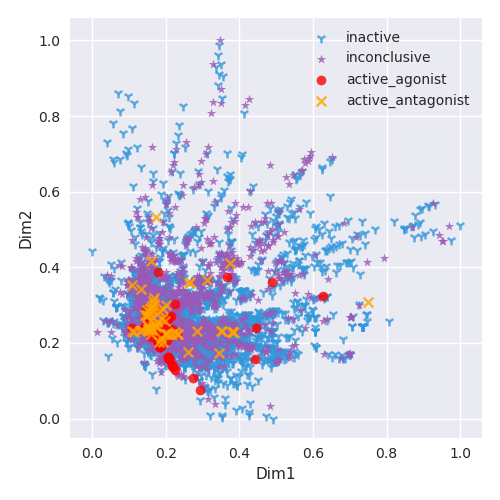

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

#sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(5,4)})
sns.lmplot('Dim1', 'Dim2', data=Zenc, hue='classes', fit_reg=False, markers=["1", "*", "o", 'x'], 
           palette=dict(inactive="#3498db", inconclusive="#9b59b6", active_agonist="#ff0000", 
                        active_antagonist="#FFA500"),legend_out = False)

plt.legend(loc='upper right', fontsize=10)

plt.show()
plt.savefig('chemical_space45.svg', bbox_inches='tight')


<IPython.core.display.Javascript object>


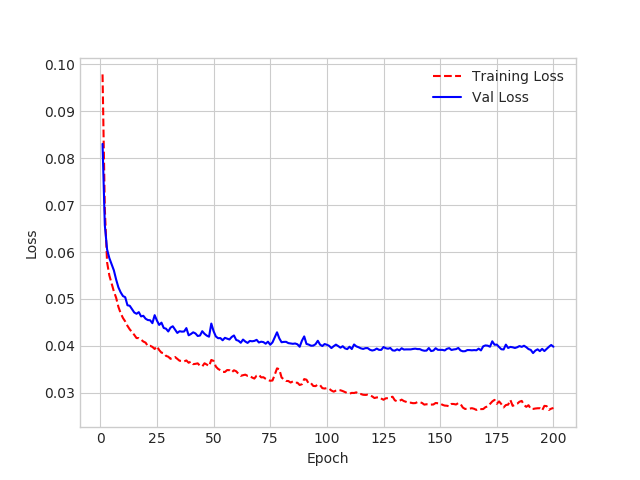

In [13]:
import matplotlib.pyplot as plt
%matplotlib notebook
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Val Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [14]:
#Try to Compute PCA Error
import numpy as np
import sklearn.datasets, sklearn.decomposition
from sklearn.metrics import mean_squared_error

mu = np.mean(Xtrain_scaled, axis=0)

pca = sklearn.decomposition.PCA(n_components=2)
pca.fit(Xtrain_scaled)
Xtrain_scaled_red = pca.transform(Xtrain_scaled)

nComp = 2
Xhat = np.dot(Xtrain_scaled_red[:,:nComp], pca.components_[:nComp,:])
Xhat += mu

In [15]:
pca_err = mean_squared_error(Xtrain_scaled, Xhat)
print('PCA Error: ', pca_err)

PCA Error:  0.0574229361825


In [16]:
pca_df = pd.DataFrame(np.hstack((minmax_scale(Xtrain_scaled_red, axis = 0),
                               y_train.reshape(y_train.shape[0],1))), 
                    columns = ['PC1', 'PC2', 'classes'])

<IPython.core.display.Javascript object>


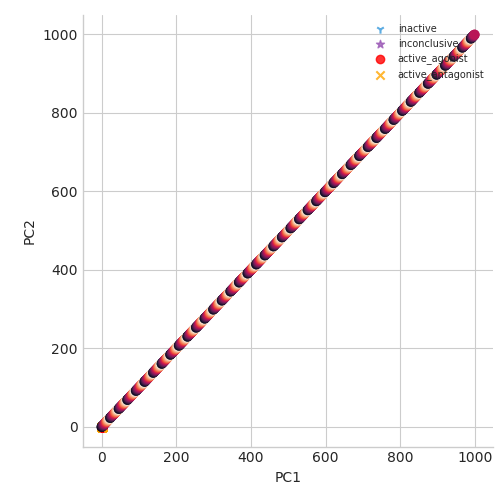

In [17]:
sns.lmplot('PC1', 'PC2', data=pca_df, hue='classes', fit_reg=False, markers=["1", "*", "o", 'x'], 
           palette=dict(inactive="#3498db", inconclusive="#9b59b6", active_agonist="#ff0000", active_antagonist="#FFA500"))

plt.legend(loc='upper right', fontsize=7)

plt.show()

In [ ]:
#Plot above is not OK